In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import re
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer
pd.options.display.max_rows = 100
pd.options.mode.copy_on_write = True

In [249]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
df.describe()


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [250]:

df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [251]:
df.drop(columns=['url', 'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime','countries','countries_tags','countries_fr','image_url','image_small_url','states','states_tags','states_fr'],inplace=True)
cols_to_drop = df.filter(regex='_n$').columns
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop = df.filter(regex='^state').columns

df.drop(columns=cols_to_drop, inplace=True)

<Axes: >

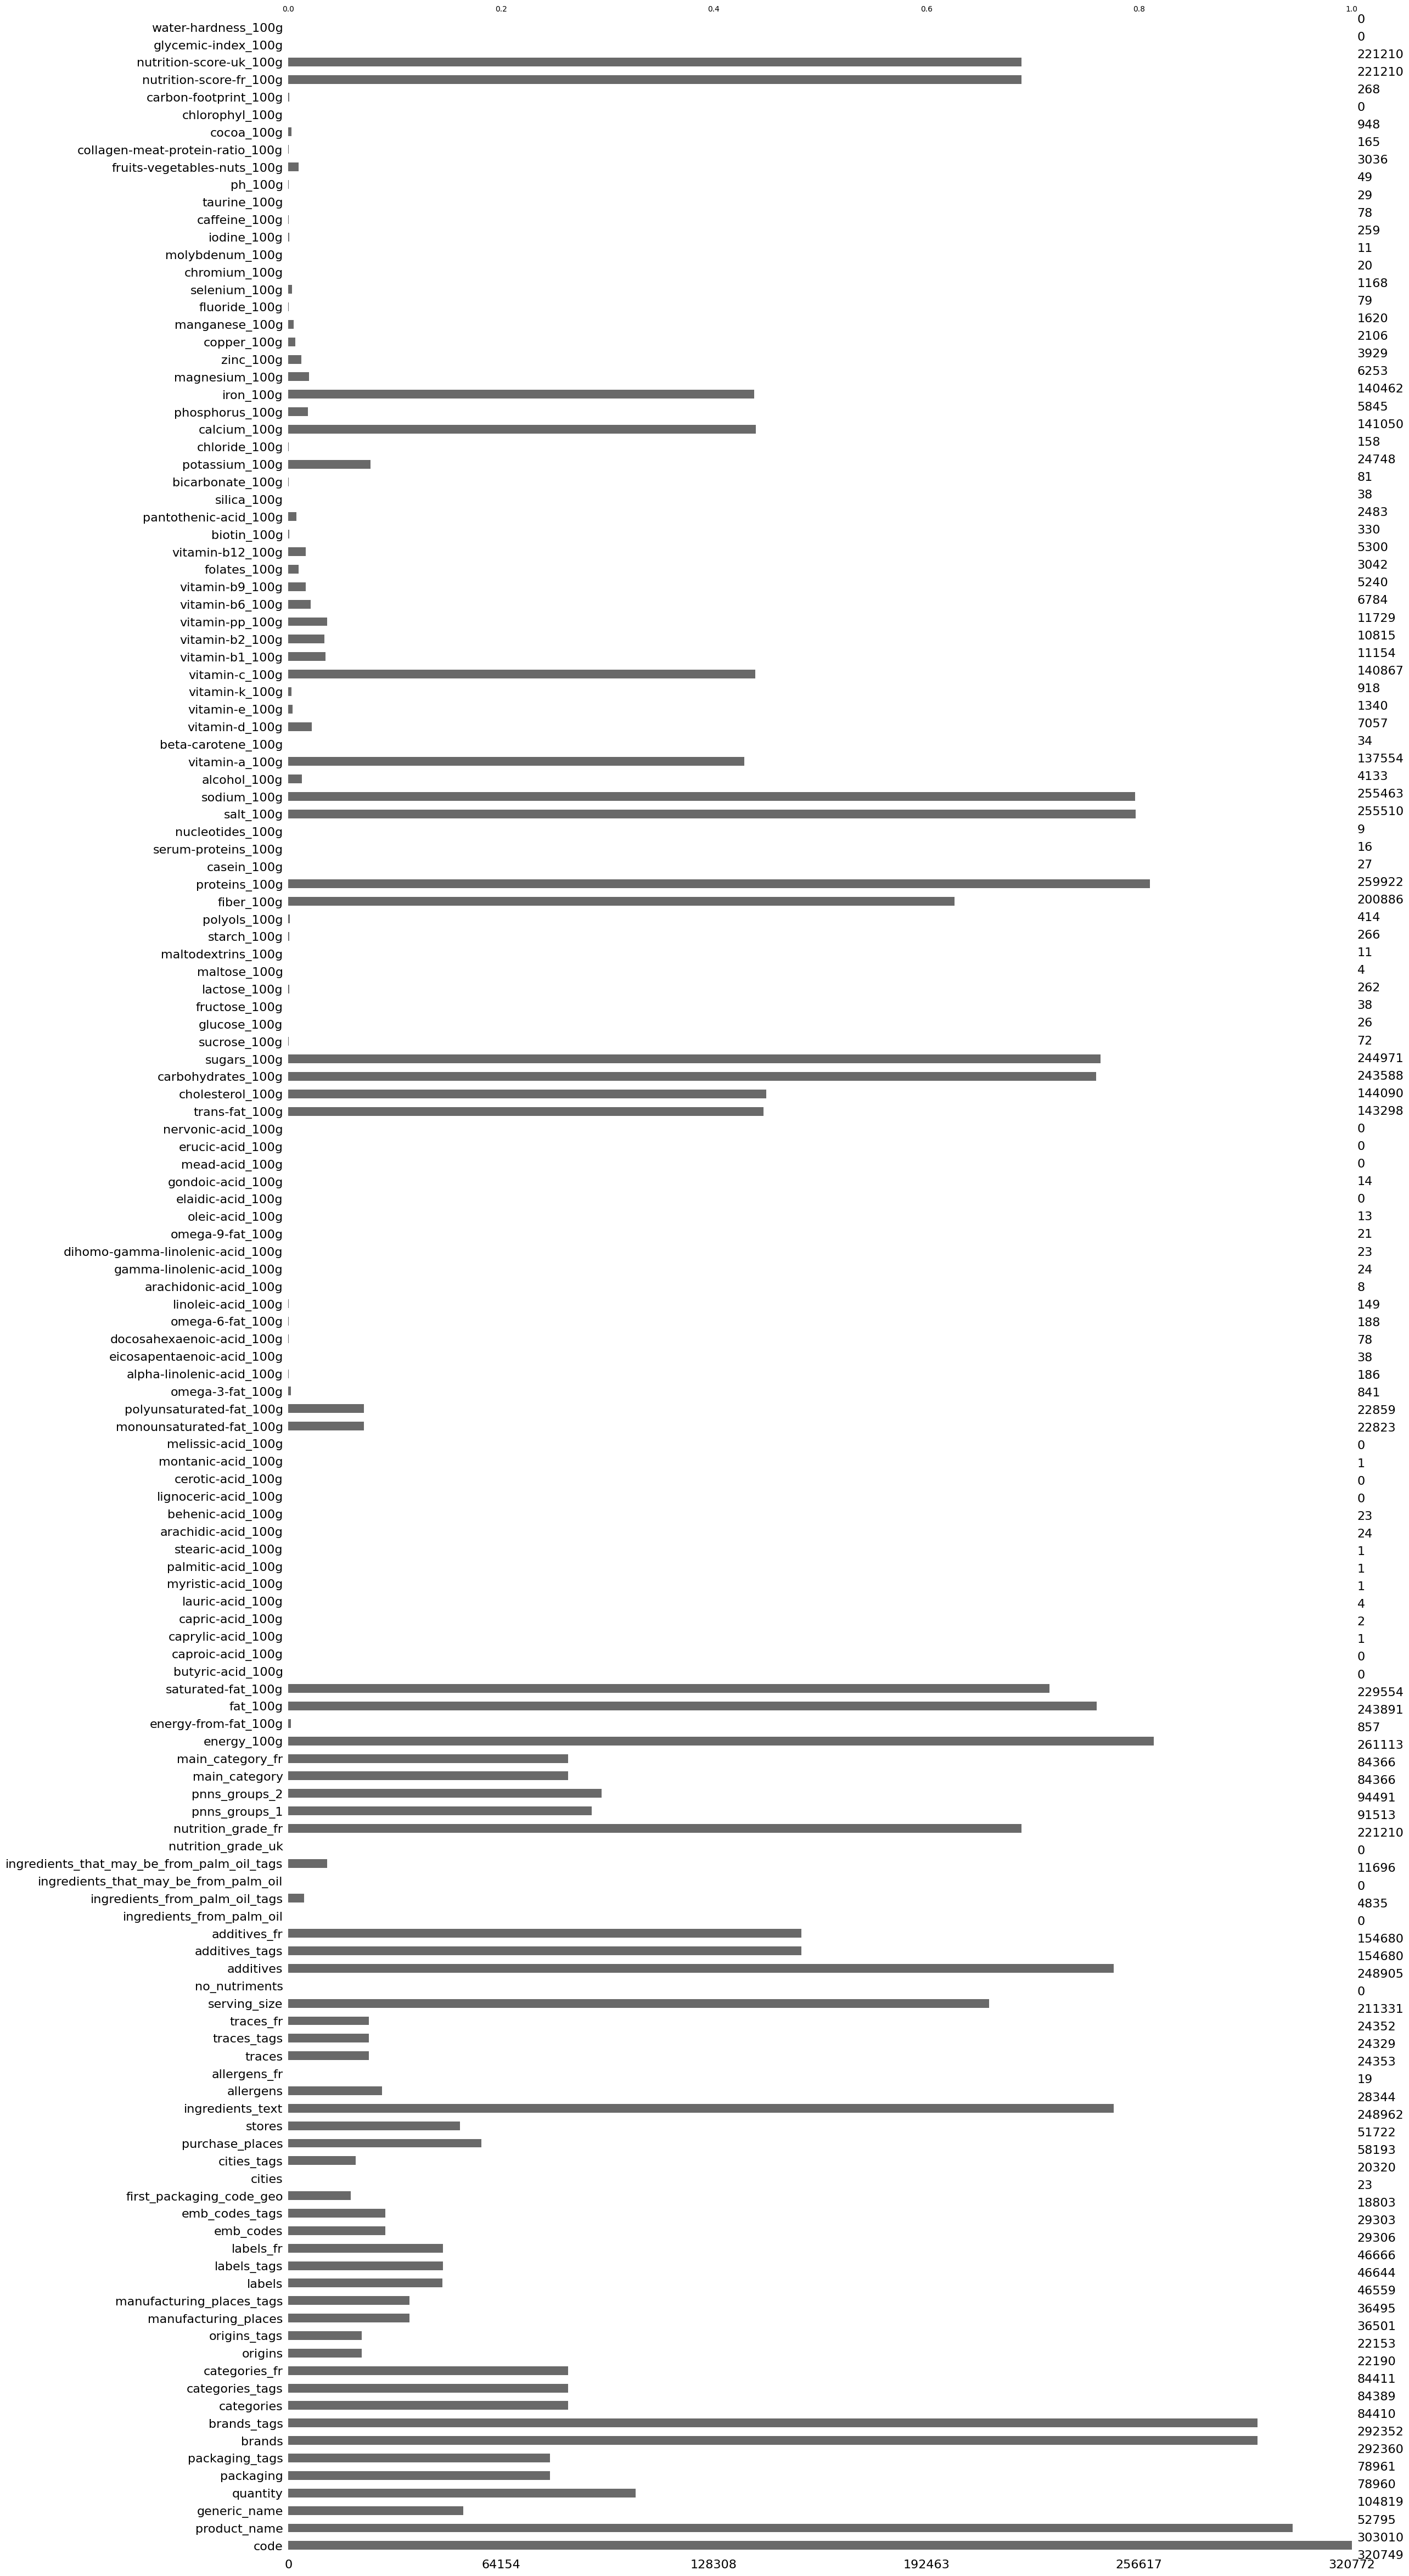

In [252]:
msno.bar(df)

In [253]:

# Calculer le nombre total de lignes
total_rows = len(df)

# Calculer le nombre de valeurs non nulles dans chaque colonne
non_null_counts = df.notna().sum()

# Calculer le taux de remplissage de chaque colonne
filling_rates = non_null_counts / total_rows * 100
filling_rates

# Filtrer les colonnes avec un taux de remplissage entre 20% et 50%
selected_columns = filling_rates[(filling_rates >= 5) ].index
selected_columns
# Conserver uniquement les colonnes sélectionnées
df_cleaned = df[selected_columns]
len(df_cleaned)

320772

<Axes: >

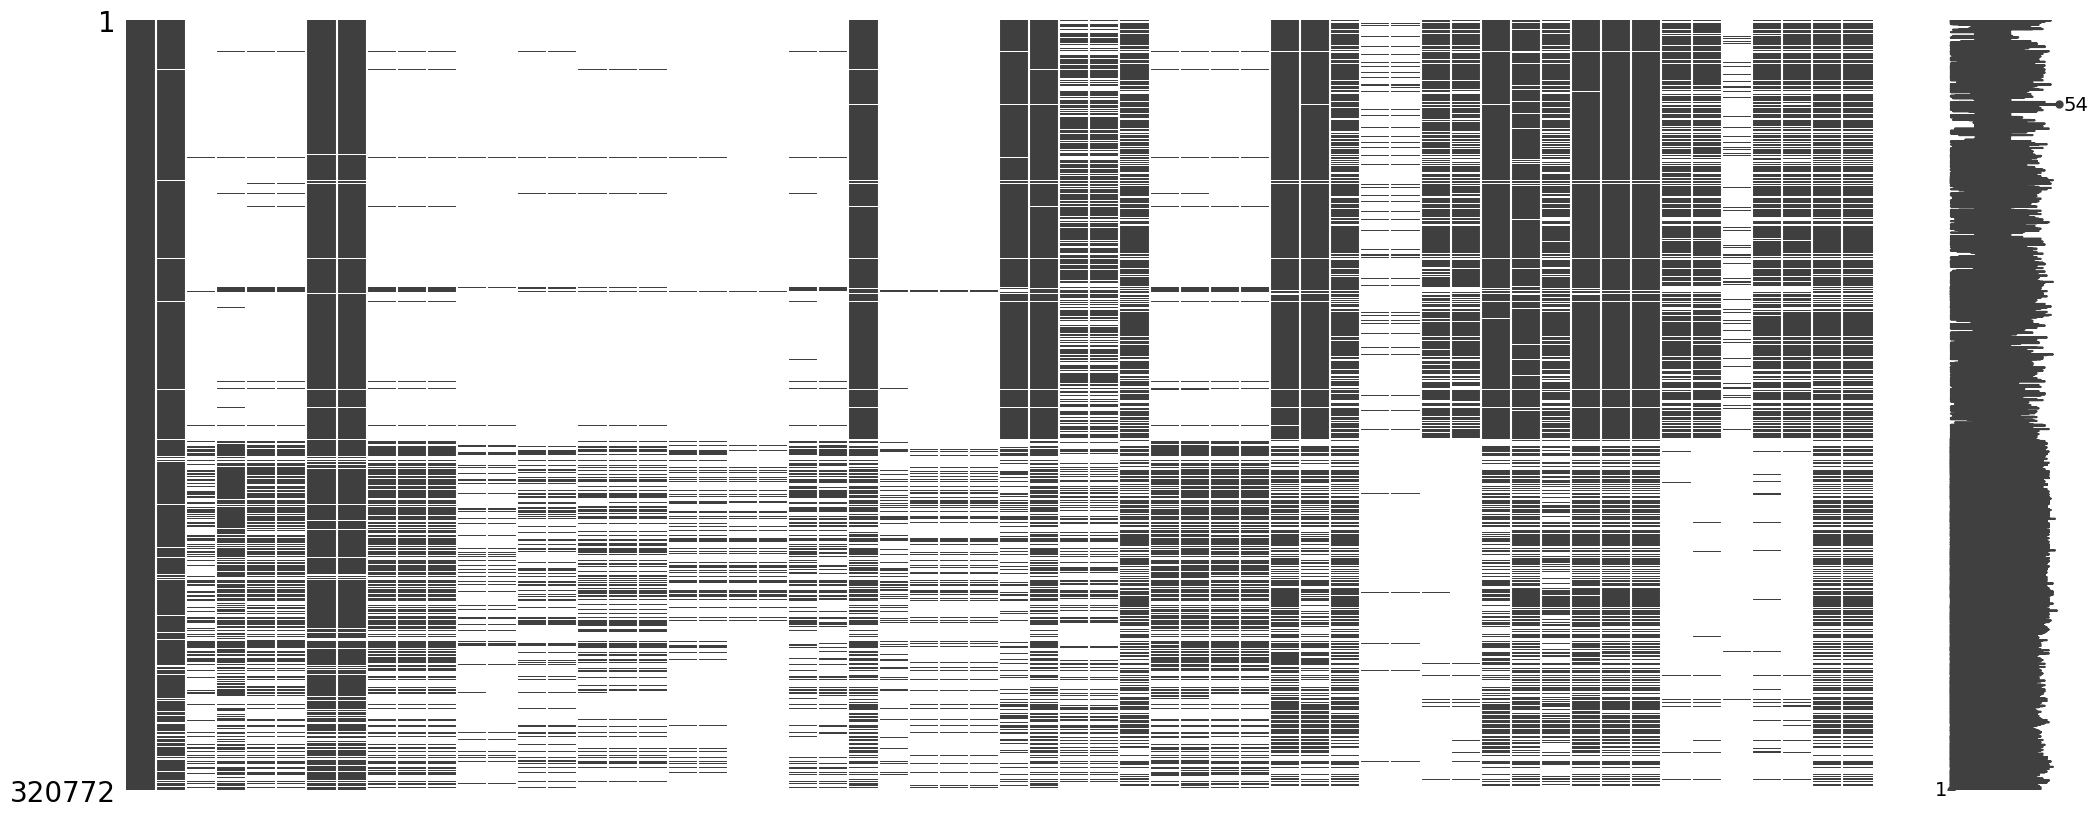

In [254]:
msno.matrix(df_cleaned)

In [255]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])
df_pnns1 = df_cible['pnns_groups_1']

In [256]:
counts = df_pnns1.value_counts().reset_index()
counts.columns = ['pnns_groups_1', 'Counts']
print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
fig = px.bar(counts, x='pnns_groups_1', y='Counts', title='Value Counts de la variable pnns_groups_1')

# Afficher le graphique
fig.show()

pnns_groups_1
unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64


In [257]:
df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"-":" "},regex=True)
df_cleaned['pnns_groups_1']=df_cleaned['pnns_groups_1'].str.lower()
df_cleaned['pnns_groups_1'].value_counts()

pnns_groups_1
unknown                    22624
sugary snacks              12864
beverages                   9033
milk and dairy products     8825
cereals and potatoes        8458
fish meat eggs              8041
fruits and vegetables       6895
composite foods             6747
fat and sauces              5216
salty snacks                2810
Name: count, dtype: int64

In [258]:

df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"Unknown":np.nan},regex=True)

<Axes: >

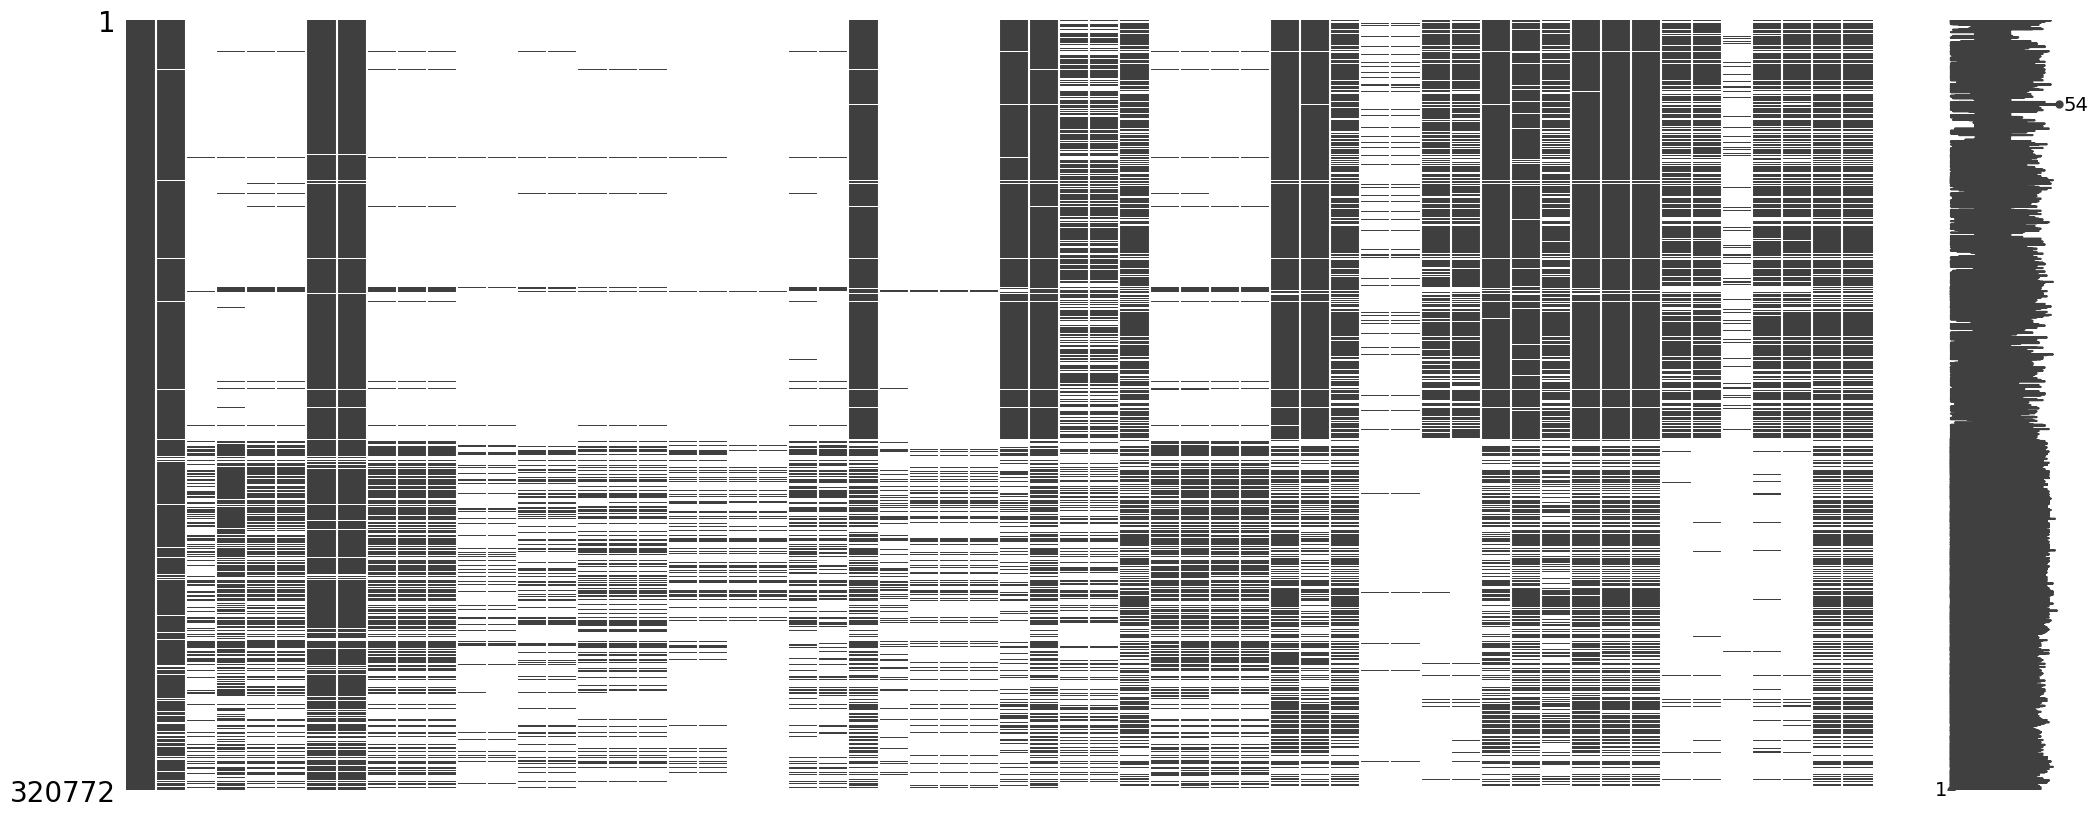

In [259]:
msno.matrix(df_cleaned)

In [261]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])

In [263]:
# Compter le nombre de valeurs non nulles dans la colonne 'ingredients_text'
nombre_de_valeurs_non_nulles = df_cleaned['ingredients_text'].count()

# Calculer le nombre total de lignes dans le DataFrame
nombre_total_de_lignes = len(df_cleaned)

# Calculer le taux de remplissage de la colonne 'ingredients_text'
taux_de_remplissage = (nombre_de_valeurs_non_nulles / nombre_total_de_lignes) * 100
taux_de_remplissage

77.61338271420199

In [ ]:
df_pnns1 = df_cleaned['pnns_groups_1']

In [ ]:
counts = df_pnns1.value_counts().reset_index()
counts.columns = ['pnns_groups_1', 'Counts']
print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
fig = px.bar(counts, x='pnns_groups_1', y='Counts', title='Value Counts de la variable pnns_groups_1')

# Afficher le graphique
fig.show()


In [ ]:
columns_100g = [col for col in df_cleaned.columns if col.endswith('_100g')]
for col in columns_100g:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='pnns_groups_1', y=col, data=df_cleaned)
    plt.title(f'Boxplot de {col} en fonction de pnns_groups_1')
    plt.xlabel('pnns_groups_1')
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.show()


# nettoyage de la colonne ingredients_text


In [ ]:
# Fonction pour supprimer le texte entre parenthèses
def remove_parentheses(text):
    if isinstance(text, str):
        return re.sub(r'\([^)]*\)', '', text)  # Supprimer le texte entre parenthèses, y compris les espaces
    else:
        return text  # Retourner la valeur d'origine si ce n'est pas une chaîne de caractères




# Appliquer la fonction à la colonne ingredients_text
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].apply(remove_parentheses)
df_cleaned['ingredients_text']=df_cleaned['ingredients_text'].str.lower()

df_cleaned_all = df_cleaned.dropna(subset=['ingredients_text'])
# Afficher le DataFrame après modification
print(df_cleaned['ingredients_text'])
df_cleaned['ingredients_text'].value_counts()

In [ ]:

non_alphabetic_pattern = re.compile(r'[^\w\s]')

In [ ]:
df_cleaned = df_cleaned[df_cleaned['ingredients_text'].apply(lambda x: isinstance(x, str))]
df_cleaned['has_non_alphabetic_ingredients'] = df_cleaned['ingredients_text'].apply(lambda text: non_alphabetic_pattern.search(text) is not None)
len(df_cleaned)

In [ ]:
df_predi = df_cleaned.drop(df_cleaned[df_cleaned['has_non_alphabetic_ingredients'] == True].index)
len(df_predi)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Séparer les lignes avec et sans valeurs manquantes dans pnns_groups_1
df_missing = df_cleaned[df_cleaned['pnns_groups_1'].isna()]
df_not_missing = df_cleaned[~df_cleaned['pnns_groups_1'].isna()]

In [ ]:
# Toutes les classes possibles (vous pouvez ajouter ou modifier selon votre jeu de données)
possible_classes = df_cleaned['pnns_groups_1'].unique()
possible_classes

In [ ]:
# Encodage des labels textuels en valeurs numériques
label_encoder = LabelEncoder()
label_encoder.fit(possible_classes)


In [ ]:
# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
df_not_missing['pnns_groups_1_encoded'] = label_encoder.transform(df_not_missing['pnns_groups_1'])


In [ ]:
# Vectorisation des ingrédients
vectorizer = TfidfVectorizer()
X_not_missing = vectorizer.fit_transform(df_not_missing['ingredients_text'])
y_not_missing = df_not_missing['pnns_groups_1_encoded']

In [ ]:
# Division des données non manquantes
X_train, X_test, y_train, y_test = train_test_split(X_not_missing, y_not_missing, test_size=0.5, random_state=42)


In [ ]:
# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
# Prédiction sur les données non manquantes pour évaluation
y_pred_encoded = knn.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test_original = label_encoder.inverse_transform(y_test)

In [ ]:
# Évaluation
print("Accuracy:", accuracy_score(y_test_original, y_pred))
print(classification_report(y_test_original, y_pred, zero_division=0))

In [ ]:
# Prédiction des valeurs manquantes
X_missing = vectorizer.fit_transform(df_missing['ingredients_text'])


In [ ]:
missing_pred_encoded = knn.predict(X_missing)
missing_pred = label_encoder.inverse_transform(missing_pred_encoded)

In [ ]:
# Ajout des prédictions au DataFrame d'origine
df_cleaned.loc[df_missing.index, 'pnns_groups_1'] = missing_pred

In [ ]:
# Affichage du DataFrame avec les prédictions ajoutées
colonnes=['ingredients_text','pnns_groups_1']
msno.matrix(df_predi[colonnes])
#df_cleaned.describe()